# Visualizing Earnings based on University Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo. 

The focus of this project is moreso experimenting with plots.

## Data Dictionary

 - Rank - Rank by median earnings (the dataset is ordered by this column).
 - Major_code - Major code.
 - Major - Major description.
 - Major_category - Category of major.
 - Total - Total number of people with major.
 - Sample_size - Sample size (unweighted) of full-time.
 - Men - Male graduates.
 - Women - Female graduates.
 - ShareWomen - Women as share of total.
 - Employed - Number employed.
 - Median - Median salary of full-time, year-round workers.
 - Low_wage_jobs - Number in low-wage service jobs.
 - Full_time - Number employed 35 hours or more.
 - Part_time - Number employed less than 35 hours.

## Exploring the Data Set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Read in the dataset
recent_grads = pd.read_csv("recent-grads.csv")

#Return first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
#Become familiar with how the data is structured
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [7]:
#Get summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
#Drop rows with missing values to avoid matplotlib errors
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

cleaned_data_count = recent_grads.dropna().shape[0]
print(cleaned_data_count)

173
172


## Scatter Plots

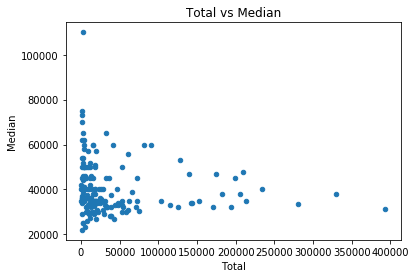

In [15]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title = 'Total vs Median')

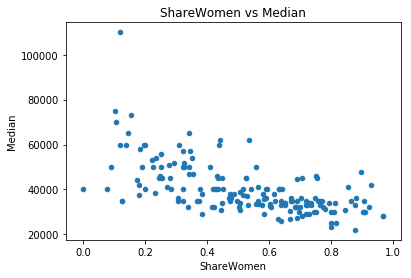

In [16]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title = 'ShareWomen vs Median')

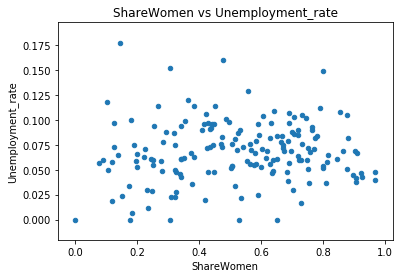

In [12]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title = 'ShareWomen vs Unemployment_rate')

We can see a few observations from the scatter plots:
 - There is a slight negative correlation between popular majors and the median salary. Less popular majors have higher median salaries, probably because they are more specialized/unique.
 - Students that majored in subject that were majority male had higher median salaries.
 - There is no correlation between ShareWomen and unemployment rate. 

## Historgrams

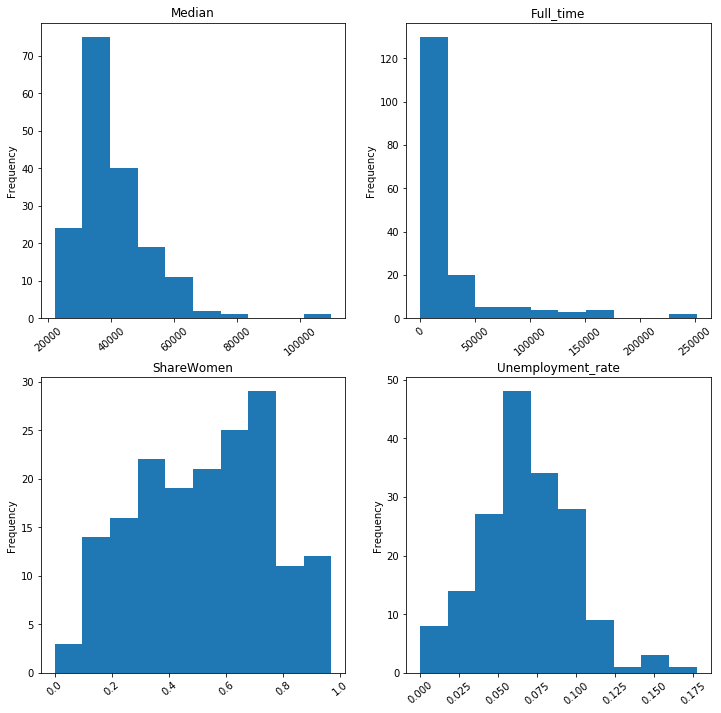

In [34]:
cols = ["Median", "Full_time", "ShareWomen", "Unemployment_rate"]

fig = plt.figure(figsize=(12,25))
for r in range(0,4):
    ax = fig.add_subplot(4,2,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40, title = cols[r])

We can see a few observations from the histograms:
 - There are more majors with a greater share of women
 - The most common median salary range is in the 30-50k range
 - Most majors have an unemployment rate between 0.03-0.1

## Scatter Matrix Plots

A scatter matrix plot combines both scatter plots and histograms into one grid and allows us to explore potential relationships and distributions simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fac8ef0>,
      dtype=object)

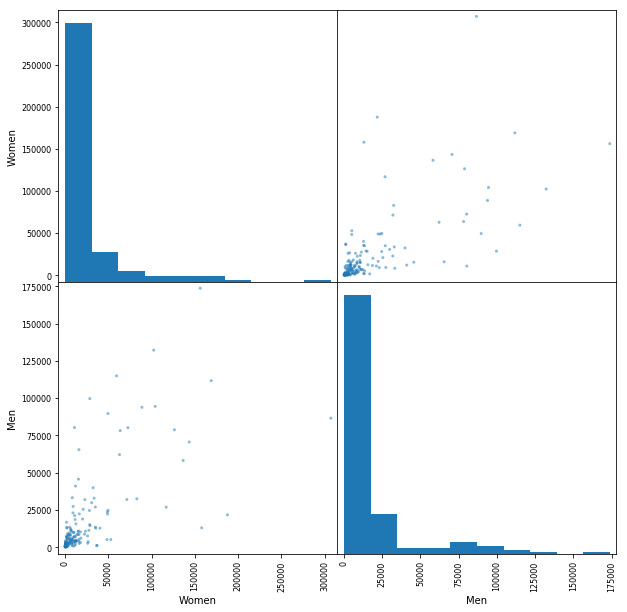

In [35]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f095b38>,
      dtype=object)

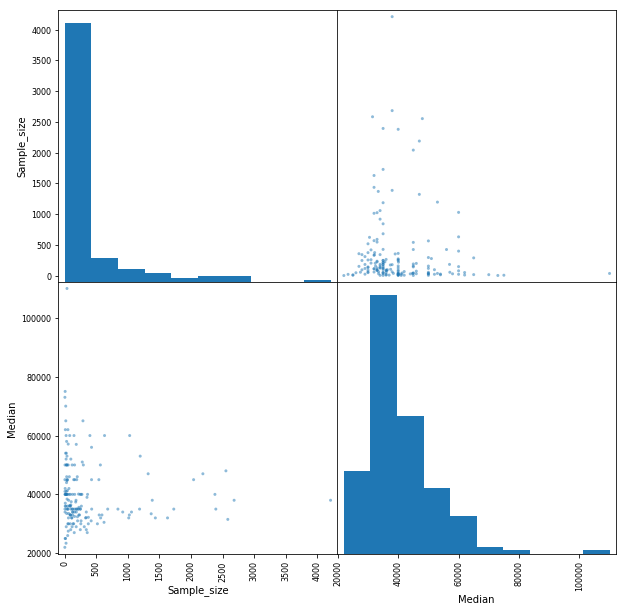

In [36]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ee5a518>,
      dtype=object)

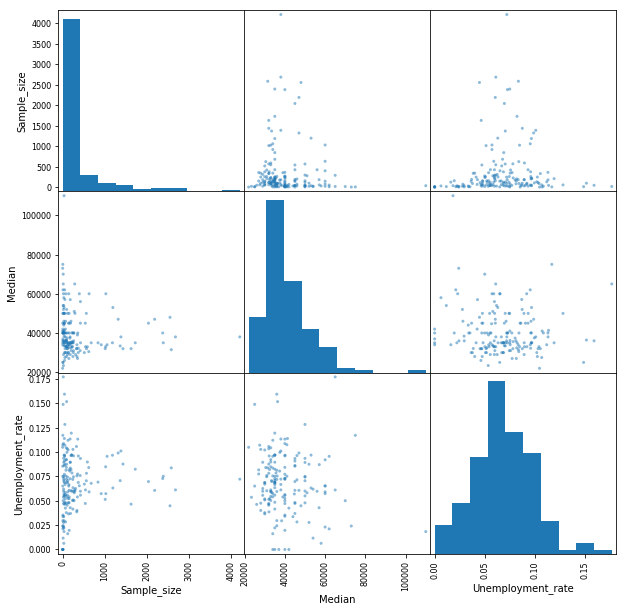

In [37]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Bar Plots

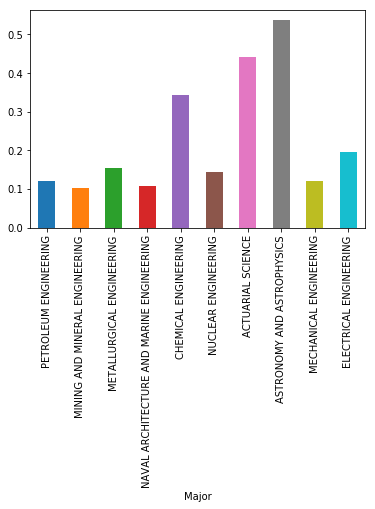

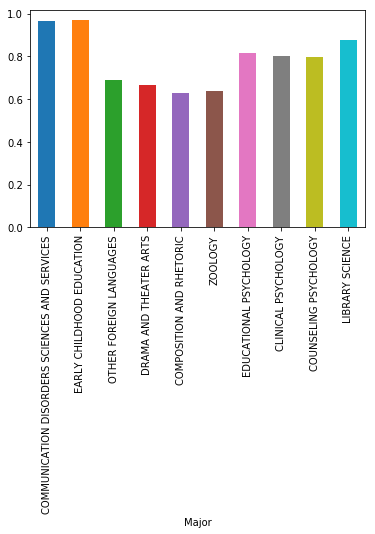

In [39]:
#Comparing shareWomen in first 10 rows and last 10 rows of the data
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)